In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time, sys
from IPython.display import clear_output, display
from time import sleep
import random
from tabulate import tabulate

In [2]:
%run -i ./Classes.ipynb

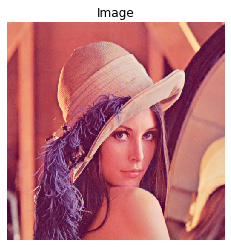

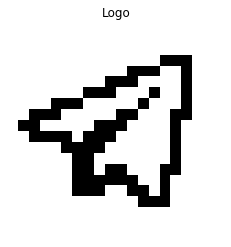

In [3]:
# Load
ori_img = cv2.imread('./assets/lena.png') #BGR
ori_logo = cv2.imread('./assets/paperplane.png', 0)

image_size = 512
logo_size = 20

# Initialize
my_image = Image(ori_img, image_size)
my_logo = Logo(ori_logo, logo_size)

ImageUtil.show1(my_image.image, '', 4)
ImageUtil.show1(my_logo.logo, '', 4)

# Embedding

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

PSNR = 37.1519147948758


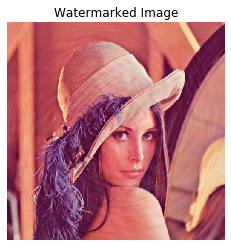

In [4]:
# Watermarker
riw = RIW(image_size, logo_size, logo_size * 2, 0.2, 24)

# Embed
img_y_watermarked = riw.embed(my_image.get_y(), my_logo.logo)

w_image = Image.copy(my_image)
w_image.set_y(img_y_watermarked)

print('PSNR = {}'.format(ImageUtil.psnr(my_image.image, w_image.image)))

ImageUtil.show1(w_image.image, '')

'Transform PCET: [####################] 100.0%'

BER = 0.00%


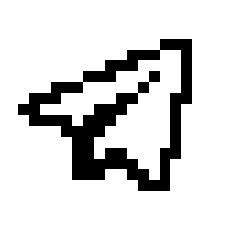

In [5]:
logo_no_attack = riw.extract(w_image.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_no_attack)))

ImageUtil.show1(logo_no_attack, '')

# Signal Processing Attack

'Transform PCET: [####################] 100.0%'

BER = 0.00%


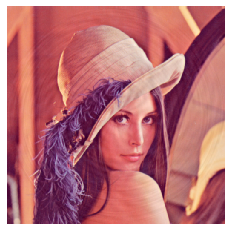

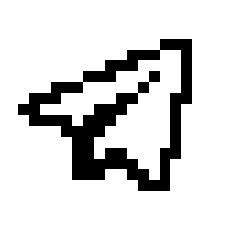

In [13]:
# Filter Gauss

image_filter_gauss = Image(Attacker.attackFilterGauss(w_image.image, 3), image_size)

logo_filter_gauss = riw.extract(image_filter_gauss.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_filter_gauss)))

ImageUtil.show1(image_filter_gauss.image, '')
ImageUtil.show1(logo_filter_gauss, '')

'Transform PCET: [####################] 100.0%'

BER = 0.50%


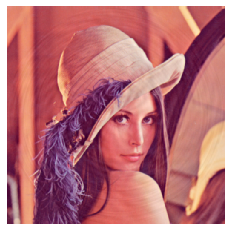

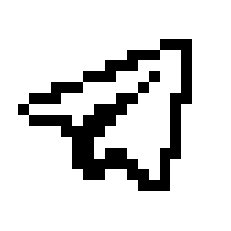

In [11]:
# Filter Average

image_filter_average = Image(Attacker.attackFilterAverage(w_image.image, 3), image_size)

logo_filter_average = riw.extract(image_filter_average.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_filter_average)))

ImageUtil.show1(image_filter_average.image, '')
ImageUtil.show1(logo_filter_average, '')

'Transform PCET: [####################] 100.0%'

BER = 0.25%


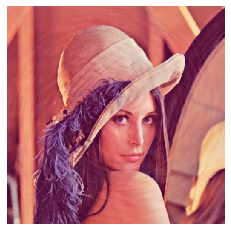

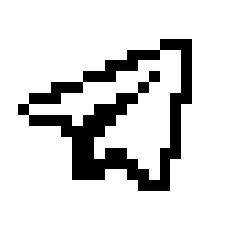

In [12]:
# Filter Median

image_filter_median = Image(Attacker.attackFilterMedian(w_image.image, 3), image_size)

logo_filter_median = riw.extract(image_filter_median.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_filter_median)))

ImageUtil.show1(image_filter_median.image, '')
ImageUtil.show1(logo_filter_median, '')

'Transform PCET: [####################] 100.0%'

BER = 5.50%


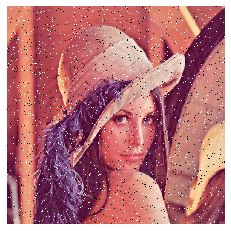

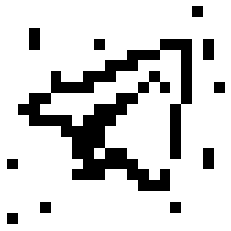

In [19]:
# Filter Noise Salat & Paper

image_noise_sp = Image(Attacker.attackNoiseSaltPepper(w_image.image, 0.03), image_size)

logo_noise_sp = riw.extract(image_noise_sp.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_noise_sp)))

ImageUtil.show1(image_noise_sp.image, '')
ImageUtil.show1(logo_noise_sp, '')

'Transform PCET: [####################] 100.0%'

BER = 6.50%


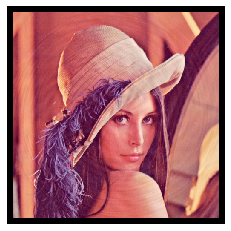

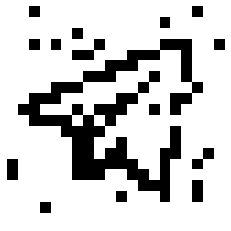

In [24]:
# Crop

image_crop = Image(Attacker.attackCrop(w_image.image, 0.03, 0.03, 0.03, 0.03), image_size)

logo_crop = riw.extract(image_crop.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_crop)))

ImageUtil.show1(image_crop.image, '')
ImageUtil.show1(logo_crop, '')

'Transform PCET: [####################] 100.0%'

BER = 0.00%


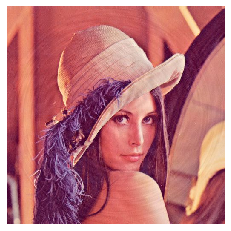

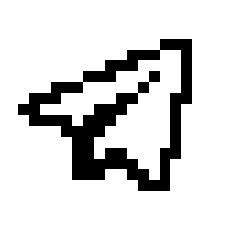

In [22]:
# JPEG Compression

image_jpeg = Image(Attacker.attackJPG(w_image.image, 80), image_size)

logo_jpeg = riw.extract(image_jpeg.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_jpeg)))

ImageUtil.show1(image_jpeg.image, '')
ImageUtil.show1(logo_jpeg, '')

# Geometric Attack

'Transform PCET: [####################] 100.0%'

BER = 1.00%


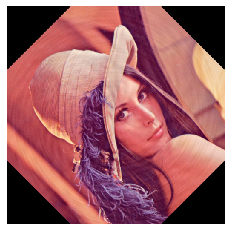

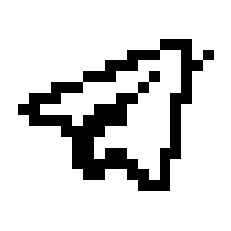

In [20]:
# Rotate

image_rotate = Image(Attacker.attackRotate(w_image.image, 45), image_size)

logo_rotate = riw.extract(image_rotate.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_rotate)))

ImageUtil.show1(image_rotate.image, '')
ImageUtil.show1(logo_rotate, '')

'Transform PCET: [####################] 100.0%'

BER = 0.00%


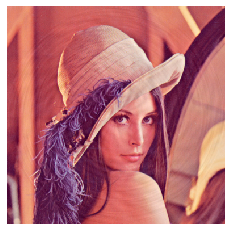

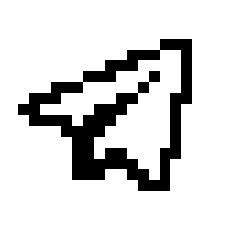

In [23]:
# Resize

new_image_size = 384
image_resize = Image(Attacker.attackResize(w_image.image, new_image_size), new_image_size)

riw_for_resize = RIW(new_image_size, logo_size, logo_size * 2, 0.2, 24)
logo_resize = riw_for_resize.extract(image_resize.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_resize)))

ImageUtil.show1(image_resize.image, '')
ImageUtil.show1(logo_resize, '')